In [103]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
url='https://raw.githubusercontent.com/Hrd2D/Sentiment-analysis-on-Google-Play-store-apps-reviews/master/google_play_store_apps_reviews_training.csv'
df=pd.read_csv(url)

In [105]:
def preprocessing(data):
    data=data.drop(columns='package_name',axis=1)
    data['review']=data['review'].str.strip().str.lower()
    return data

In [106]:
data=preprocessing(df)

In [119]:
x=data['review']
y=data['polarity']
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.25,random_state=42)

In [120]:
vec=CountVectorizer(stop_words='english')
x_train=vec.fit_transform(x_train).toarray()
x_test=vec.transform(x_test).toarray()

In [121]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [122]:
y_pred=model.predict(x_test)

In [123]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[140,   6],
       [ 26,  51]], dtype=int64)

In [124]:
model.score(x_test, y_test)

0.8565022421524664

In [125]:
model.predict(vec.transform(['This movie is utterly awesome']))

array([1], dtype=int64)

In [126]:
print('F1 Score:',2*((metrics.precision_score(y_test,y_pred)*metrics.recall_score(y_test,y_pred))/(metrics.precision_score(y_test,y_pred)+metrics.recall_score(y_test,y_pred))))

F1 Score: 0.7611940298507462


In [127]:
print('Accuracy',metrics.accuracy_score(y_test,y_pred))
print('Precision',metrics.precision_score(y_test,y_pred))
print('Recall',metrics.recall_score(y_test,y_pred))

Accuracy 0.8565022421524664
Precision 0.8947368421052632
Recall 0.6623376623376623


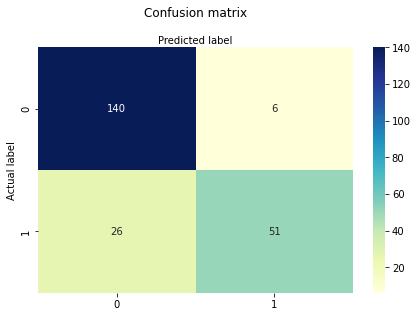

In [128]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()